<a href="https://colab.research.google.com/github/KeertanPatro/Sales_Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Looking into sales transactions

In [3]:
path1='/content/drive/MyDrive/Colab Notebooks/Self_projects/Retail transaction data/Retail_Data_Transactions.csv'
trans_df=pd.read_csv(path1)
trans_df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


Looking into customer response file

In [4]:
response_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Self_projects/Retail transaction data/Retail_Data_Response.csv')
response_df.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [5]:
# transactions info
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


From the above we see that data type of customer_id and transaction amount is object and integer respectfully which is fine but the data typ of transaction date should be of date type instead of object type.

In [6]:
trans_df.isna().sum()

customer_id    0
trans_date     0
tran_amount    0
dtype: int64

In [7]:
trans_df.shape

(125000, 3)

There are 125000 entries and there are no missing values in any of the column.

In [8]:
# changing the data type of trans date.
trans_df['trans_date']=pd.to_datetime(trans_df['trans_date'])
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  125000 non-null  object        
 1   trans_date   125000 non-null  datetime64[ns]
 2   tran_amount  125000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [9]:
# looking for duplicates
trans_df.loc[trans_df.duplicated()]

,customer_id,trans_date,tran_amount
14324,CS2700,2011-10-23,48
59852,CS3458,2015-02-11,40
77236,CS2761,2014-03-03,75
91603,CS2565,2012-09-14,67
105496,CS7782,2014-12-30,70
121962,CS8394,2013-07-14,16


There are 6 duplicates, it is possible that the customer might have purchased the same item again, so we will not remove that item.

In [10]:
# let us extract year, month from the table
trans_df['year']=trans_df['trans_date'].dt.year
trans_df['month']=trans_df['trans_date'].dt.month
trans_df['month-year']=trans_df['trans_date'].dt.strftime('%m-%Y')

In [11]:
trans_df


,customer_id,trans_date,tran_amount,year,month,month-year
0,CS5295,2013-02-11,35,2013,2,02-2013
1,CS4768,2015-03-15,39,2015,3,03-2015
2,CS2122,2013-02-26,52,2013,2,02-2013
3,CS1217,2011-11-16,99,2011,11,11-2011
4,CS1850,2013-11-20,78,2013,11,11-2013
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,2011,6,06-2011
124996,CS7232,2014-08-19,38,2014,8,08-2014
124997,CS8731,2014-11-28,42,2014,11,11-2014
124998,CS8133,2013-12-14,13,2013,12,12-2013


### Exploring  Customers

In [12]:
# exploring customers
# unique customers
trans_df['customer_id'].nunique()

6889

In [13]:
# exploring total sales for each customer
sales_df=trans_df.groupby('customer_id')['tran_amount'].sum()
sales_df

customer_id
CS1112    1012
CS1113    1490
CS1114    1432
CS1115    1659
CS1116     857
          ... 
CS8996     582
CS8997     543
CS8998     624
CS8999     383
CS9000     533
Name: tran_amount, Length: 6889, dtype: int64

In [14]:
# exploring number of customer transaction
trans_df['customer_id'].value_counts()

CS4424    39
CS4320    38
CS3799    36
CS1215    35
CS5109    35
          ..
CS8559     4
CS7716     4
CS8376     4
CS7224     4
CS7333     4
Name: customer_id, Length: 6889, dtype: int64

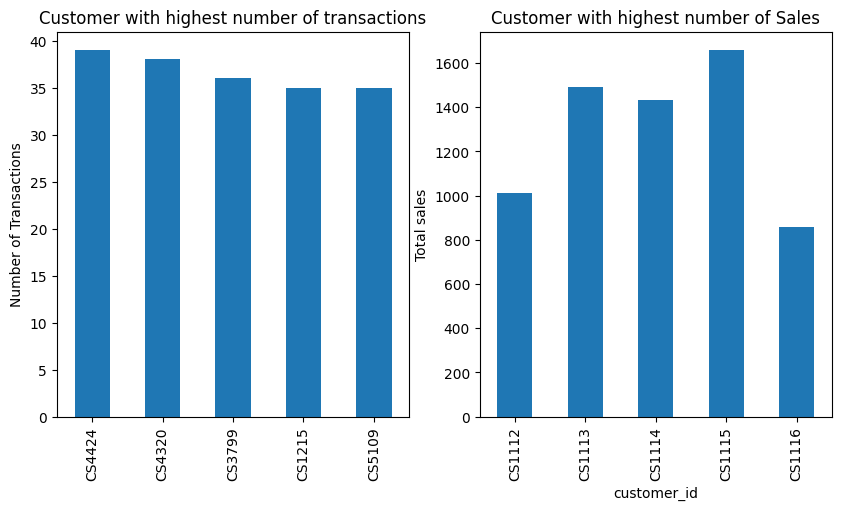

In [15]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
trans_df['customer_id'].value_counts()[:5].plot.bar(ax=axes[0])
axes[0].set_ylabel("Number of Transactions")
axes[0].set_title("Customer with highest number of transactions")
sales_df[:5].plot.bar(ax=axes[1])
axes[1].set_ylabel('Total sales')
axes[1].set_title("Customer with highest number of Sales")
plt.show()

### Exploring Transaction Amount

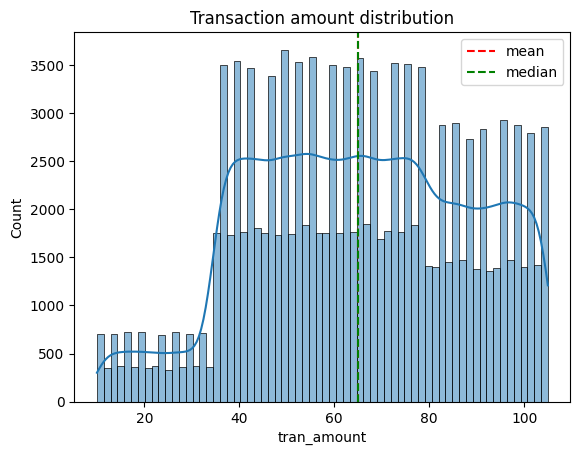

In [16]:
sns.histplot(trans_df['tran_amount'],kde=True)
plt.axvline(trans_df['tran_amount'].mean(),linestyle='dashed',color='red',label='mean')
plt.axvline(trans_df['tran_amount'].median(),linestyle='dashed',color='green',label='median')
plt.legend()
plt.title('Transaction amount distribution')
plt.show()

In [17]:
#maximum transaction
trans_df['tran_amount'].max()

105

In [18]:
#minimum transaction
trans_df['tran_amount'].min()

10

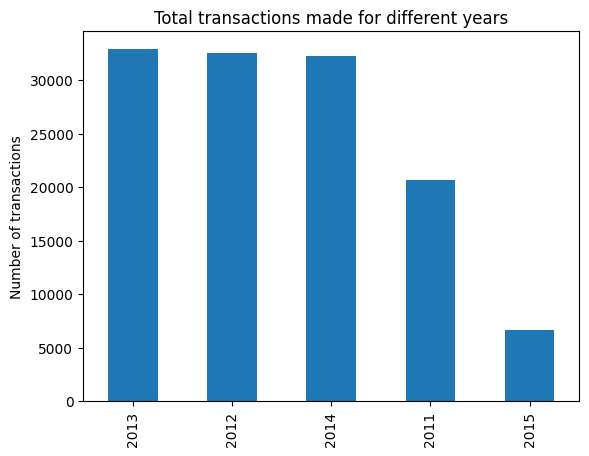

In [19]:
# number of transactions based on years
trans_df['year'].value_counts().plot.bar()
plt.ylabel("Number of transactions")
plt.title("Total transactions made for different years")
plt.show()

### Exploring Customer behaviour with Time

In [20]:
# year for which customers purchased the most
year_count=trans_df.groupby(['customer_id','year']).count()['trans_date'].sort_values(ascending=False).reset_index()
year_count['count']=year_count['trans_date']
year_count.drop('trans_date',axis=1,inplace=True)
year_count.head(10)

,customer_id,year,count
0,CS2299,2012,18
1,CS1541,2013,17
2,CS2421,2012,16
3,CS4967,2013,15
4,CS4074,2014,15
5,CS4320,2013,15
6,CS1215,2013,15
7,CS3426,2014,14
8,CS1978,2012,14
9,CS1580,2012,14


In [21]:
total_transaction=trans_df.groupby(['customer_id','year']).sum()['tran_amount'].sort_values(ascending=False).reset_index()
total_transaction['total_transaction']=total_transaction['tran_amount']
total_transaction.drop('tran_amount',axis=1,inplace=True)
total_transaction.head(10)

<ipython-input-21-e2842cedeed4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_transaction=trans_df.groupby(['customer_id','year']).sum()['tran_amount'].sort_values(ascending=False).reset_index()


,customer_id,year,total_transaction
0,CS1541,2013,1317
1,CS2421,2012,1242
2,CS2299,2012,1230
3,CS4967,2013,1203
4,CS4329,2012,1145
5,CS1215,2013,1059
6,CS3842,2013,1033
7,CS2945,2014,1029
8,CS4074,2014,1027
9,CS4320,2013,1017


### Top Customers based on transactions

In [22]:
df=trans_df.groupby('customer_id').sum()['tran_amount'].sort_values(ascending=False).reset_index().rename(columns={'tran_amount':'total_transaction_amount'})
df

<ipython-input-22-43e1488719a6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=trans_df.groupby('customer_id').sum()['tran_amount'].sort_values(ascending=False).reset_index().rename(columns={'tran_amount':'total_transaction_amount'})


,customer_id,total_transaction_amount
0,CS4424,2933
1,CS4320,2647
2,CS5752,2612
3,CS4660,2527
4,CS3799,2513
...,...,...
6884,CS8841,181
6885,CS8077,164
6886,CS8559,157
6887,CS8234,157


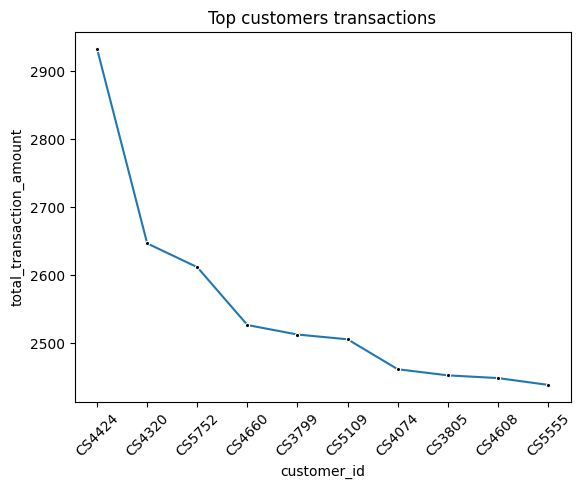

In [23]:
plt.figure()
sns.lineplot(x='customer_id',y='total_transaction_amount',data=df[:10],marker='.',mfc='black')
plt.xticks(rotation=45)
plt.title("Top customers transactions")
plt.show()

### Customer transaction amount and transaction count behavior

In [24]:
result=trans_df.groupby('customer_id').agg({'tran_amount':['count','sum']}).reset_index()
result.columns=['customer_id','count','sum']
result

,customer_id,count,sum
0,CS1112,15,1012
1,CS1113,20,1490
2,CS1114,19,1432
3,CS1115,22,1659
4,CS1116,13,857
...,...,...,...
6884,CS8996,13,582
6885,CS8997,14,543
6886,CS8998,13,624
6887,CS8999,12,383


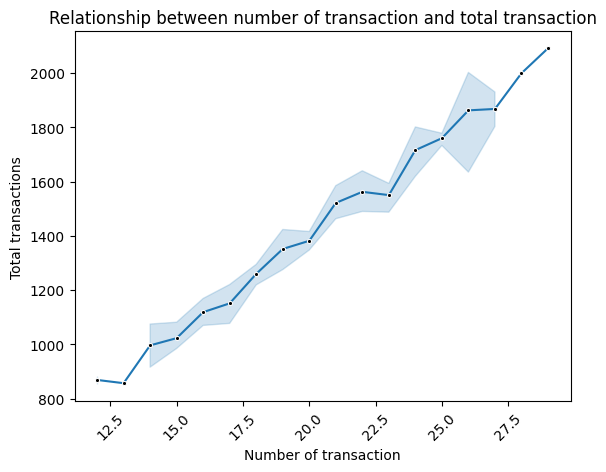

In [25]:

sns.lineplot(x='count',y='sum',data=result[:100],marker='.',mfc='black')
plt.xticks(rotation=45)
plt.title("Relationship between number of transaction and total transaction")
plt.xlabel('Number of transaction')
plt.ylabel('Total transactions')
plt.show()

### Customer Segmentation

We need to segment our customers based on their transactions for that we will use KMeans Clustering.  

To find optimal clusters we will use silhoutte score.

We will add another column called recency into our result dataframe.

In [26]:
trans_df['year'].unique()

array([2013, 2015, 2011, 2014, 2012])

In [27]:
result['recency']=trans_df.groupby('customer_id')['year'].max().reset_index()['year']
result

,customer_id,count,sum,recency
0,CS1112,15,1012,2015
1,CS1113,20,1490,2015
2,CS1114,19,1432,2015
3,CS1115,22,1659,2015
4,CS1116,13,857,2014
...,...,...,...,...
6884,CS8996,13,582,2014
6885,CS8997,14,543,2014
6886,CS8998,13,624,2014
6887,CS8999,12,383,2014


In [28]:
result['recency']=result['recency'].apply(lambda x: 1 if x>2014 else 0)
result['recency']

0       1
1       1
2       1
3       1
4       0
       ..
6884    0
6885    0
6886    0
6887    0
6888    1
Name: recency, Length: 6889, dtype: int64

In [29]:

X=result.loc[:,['count','sum','recency']]
# standardizing our X variables
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.60563997, -0.35910291,  0.79406079],
       [ 0.35726189,  0.66709123,  0.79406079],
       [ 0.16468152,  0.54257395,  0.79406079],
       ...,
       [-0.99080071, -1.19208059, -1.25934942],
       [-1.18338108, -1.70947136, -1.25934942],
       [-0.99080071, -1.38744391,  0.79406079]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

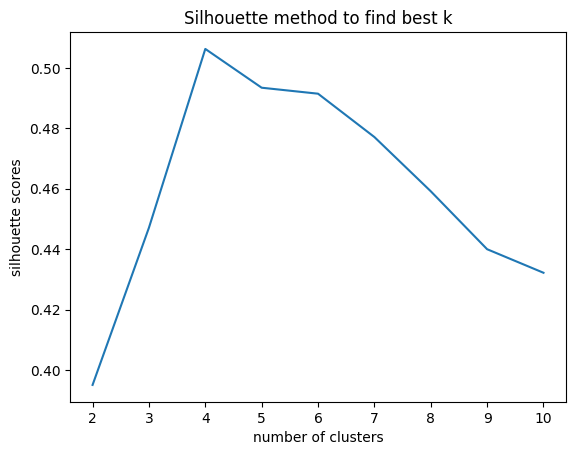

In [30]:
sil_score=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_scaled)
  labels=kmeans.labels_
  sil_score.append(silhouette_score(X_scaled, labels))


# plotting silhoutte score for various values of k
plt.plot(range(2,11),sil_score)
plt.xlabel('number of clusters')
plt.ylabel('silhouette scores')
plt.title('Silhouette method to find best k')
plt.show()

In [31]:
sil_score

[0.39507361431128896,
 0.447112681633421,
 0.5062989616415606,
 0.4934560333856537,
 0.4914784850553572,
 0.47713048676681896,
 0.4591822870077588,
 0.4399969550863038,
 0.43220126426889627]

We see that silhoutte score is maximum for k=4, so there are four clusters.

In [32]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans.fit(X_scaled)
label=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# creating label called cluster
result['labels']=label

In [34]:
def customer_cat(labels):
  if labels==0:
    return 'P0'
  elif labels==1:
    return 'P1'
  elif labels==2:
    return 'P2'
  elif labels==3:
    return 'P3'
result['labels']=result['labels'].apply(customer_cat)
result

,customer_id,count,sum,recency,labels
0,CS1112,15,1012,1,P2
1,CS1113,20,1490,1,P1
2,CS1114,19,1432,1,P1
3,CS1115,22,1659,1,P1
4,CS1116,13,857,0,P0
...,...,...,...,...,...
6884,CS8996,13,582,0,P0
6885,CS8997,14,543,0,P0
6886,CS8998,13,624,0,P0
6887,CS8999,12,383,0,P0


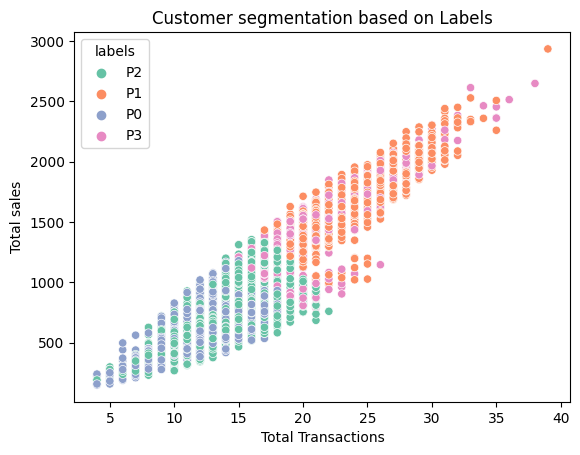

In [35]:
sns.scatterplot(x='count',y='sum',hue='labels',data=result,palette='Set2')
plt.ylabel("Total sales")
plt.xlabel("Total Transactions")
plt.title("Customer segmentation based on Labels")
plt.show()

### Churn Analysis

In [36]:
response_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Self_projects/Retail transaction data/Retail_Data_Response.csv')
response_df

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


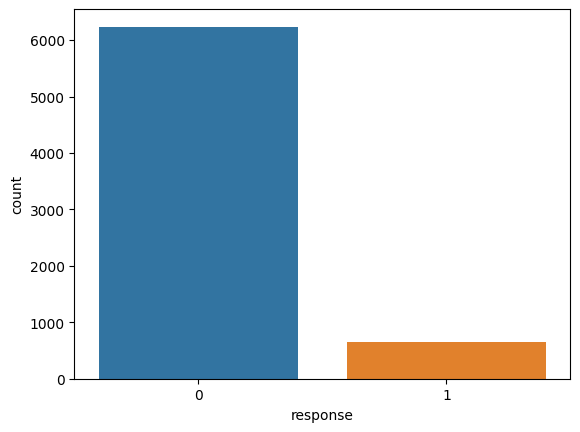

In [37]:
sns.countplot(data=response_df,x=response_df['response'])
plt.show()

From the above response plot we see that that there are lot of zero response customers and very few customer responded.

### Time Series Analysis  

In [63]:
time_ser=trans_df.groupby('month-year').sum()['tran_amount'].reset_index()

<ipython-input-63-8002becd9537>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_ser=trans_df.groupby('month-year').sum()['tran_amount'].reset_index()


In [65]:
time_ser['month-year']=pd.to_datetime(time_ser['month-year'])
time_ser

,month-year,tran_amount
0,2012-01-01,177987
1,2013-01-01,181729
2,2014-01-01,184554
3,2015-01-01,179837
4,2012-02-01,170135
5,2013-02-01,160359
6,2014-02-01,154151
7,2015-02-01,160509
8,2012-03-01,180453
9,2013-03-01,181491


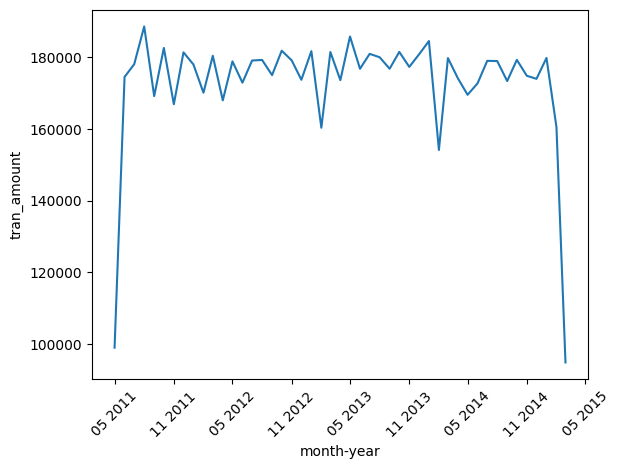

In [74]:
import matplotlib.dates as mdates
sns.lineplot(data=time_ser,x=time_ser['month-year'],y=time_ser['tran_amount'])
locator=mdates.MonthLocator(interval=6)
formatter=mdates.DateFormatter('%m %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
plt.show()

From the above sales analysis we see that the transaction amount has been steady but there is a sudden decline from year 2015 onwards.